In [1]:
from aestheval.data.datasets import PCCD
import torch
SPLITS = ('train', 'validation', 'test')

pccd_dataset = [PCCD(split, dataset_path= "/media/data-storage/datasets/PCCD",load_images=False) for split in SPLITS]

/home/daniel/anaconda3/envs/aestheval/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: /home/daniel/anaconda3/envs/aestheval/lib/python3.10/site-packages/torchvision/image.so: undefined symbol: _ZN5torch3jit17parseSchemaOrNameERKNSt7__cxx1112basic_stringIcSt11char_traitsIcESaIcEEE
  warn(f"Failed to load image Python extension: {e}")


In [2]:
dataset = torch.utils.data.ConcatDataset(pccd_dataset)

In [3]:
dataset[0]

(None,
 {'general_impression': 'Hello Mickel,Indoor sports is tough but you made a good start with this. At least (and perhaps most importantly) you had good timing. The rest can be learned but your good instincts are right on.',
  'subject_of_photo': 'Sports photography is a terrific subject and you picked a dandy one here but...',
  'composition': "I photograph indoor basketball quite a bit so I'm familiar with the limitations of the court. You were in a good position for this photograph to be made. The horizon line is level and the framing is balanced.",
  'use_of_camera': "Faster shutter speed. Longer lens. F/stop of 5.6 is OK. Higher ISO. Specific white balance.Faster shutter speed will help you freeze the moment. You'll need to increase the light sensitivity setting to accomplish this without use of a flash. I am usually set to ISO 2500, 3200 and 5000. Even at ISO 2500 you're new shutter speed would be 1/200. The shallow depth of field (f/5.6) is appropriate and will help isolate

In [4]:
len(dataset)

4235

In [5]:
keys = dataset.datasets[0].attributes
keys

['general_impression',
 'subject_of_photo',
 'composition',
 'use_of_camera',
 'depth_of_field',
 'color_lighting',
 'focus']

In [6]:
ncomments=[]
nwords = []
for im, d in dataset:
    # print(d)
    comments = [d[k] for k in keys if d[k]]
    ncomments.append(len(comments))
    nwords.extend([len(x.split()) for x in comments])
import pandas as pd
pd.Series(ncomments).describe()

count    4235.000000
mean        6.628099
std         0.647523
min         4.000000
25%         6.000000
50%         7.000000
75%         7.000000
max         7.000000
dtype: float64

In [7]:
pd.Series(nwords).describe()

count    28070.000000
mean        41.097186
std         41.656863
min          1.000000
25%         14.000000
50%         30.000000
75%         55.000000
max        780.000000
dtype: float64

In [8]:
import statistics as st
from tqdm import tqdm 

def compute_mean(list_of_scores):
    good_scores = []
    for i in list_of_scores:
        try:
            good_scores.append(int(i))
        except:
            continue
    return st.mean(good_scores)

gt_scores, pred_scores = zip(*[(compute_mean(data['score']), data['mean_score']) for _, data in tqdm(dataset)])



100%|██████████| 4235/4235 [00:00<00:00, 128724.90it/s]


In [9]:
from scipy import stats
import sklearn.metrics as sm

srcc = stats.spearmanr(gt_scores, pred_scores)
print("SRCC =", srcc)
mse = round(sm.mean_squared_error(gt_scores, [score*10 for score in pred_scores]), 4)
print("MSE =", mse)
lcc = stats.pearsonr(gt_scores, pred_scores)
print("LCC =", lcc)

SRCC = SpearmanrResult(correlation=0.6095497059536509, pvalue=0.0)
MSE = 1.5729
LCC = (0.6499357318742438, 0.0)


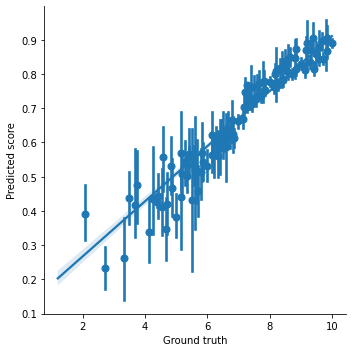

In [10]:
import pandas as pd
df = pd.DataFrame({
    "Ground truth": gt_scores,
    "Predicted score": pred_scores
    })
import seaborn as sns
ax = sns.lmplot(x="Ground truth", y="Predicted score", data=df, x_bins=1000)


<AxesSubplot:ylabel='Frequency'>

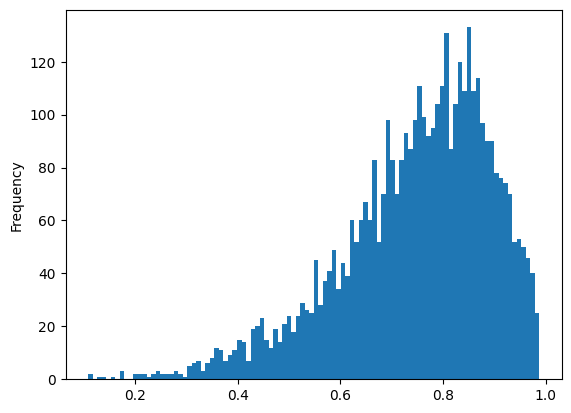

In [11]:
import pandas as pd
pd.Series([data['mean_score'] for _, data in dataset]).plot(kind='hist', bins=100)


<AxesSubplot:ylabel='Frequency'>

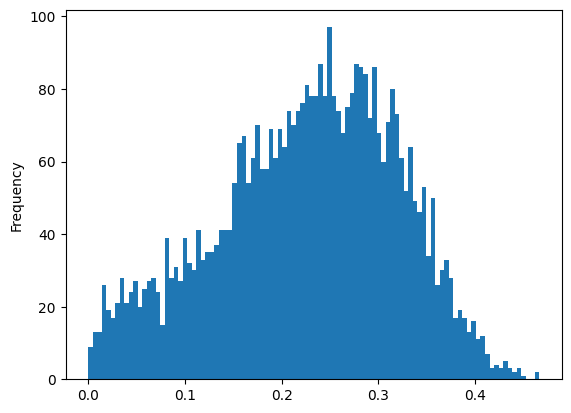

In [13]:
pd.Series([data['stdev_score'] for _, data in dataset]).plot(kind='hist', bins=100)
